# Spatial Analysis with Geopandas

A considerable amount of data generated is spatial in nature, for example earth observation data. As an analyst, you can uncover deeper insights from not only working with spatial data but by combining spatial data with other characteristics of those data points. For example, the location of schools in a county with the numbe of students, teachers etc in each of the schools. This opens the door for deeper and more useful analysis.

## Getting Started [Installation]
We will be working with Geopandas, which is an open-source package for spatial analysis in Python. Now, Geopandas relies on very many libraries for it to function, so I suggest using 'anaconda' to install and work with Geopandas. This way, anaconda handles all the nitty gritty of installing all the necessary dependencies for you.

#### Steps to setting up/installing Geopandas via Anaconda

1. Go to the Anaconda Website, download the anaconda executable and run it on your PC. Follow all the steps.
2. Open the Anaconda Command Prompt
3. Create a virtual environment for your project

 " conda create -n geopandas-env python=3.10 geopandas -y"
 This create a virtual environment called 'geopandas-env'

4. Activate your virtual environment
 "conda activate geopandas-env"

5. In the conda command prompt, navigate to your folder or create a new folder using 'mkidir'

6. Open VS code

# Types of Spatial Data

Spatial data, usually comes in one of two formats

### - Vector Data
Vector data represents geographic features as points, lines and polygons. For instance, points are like GPS coordinates, lines are used to represent rivers, roads or pipelines and polygons represent lakes, parcels of land, countries etc.

### - Raster data
Raster data represents geographic features as a grid of cells/pixels, with each containing a value representing information such as elevation, temperature, land cover etc...

#### NOTE!!!
Geopandas is desinged to work with vector data, but with other special packages such as rasterio, it can handle analysis of raster data.

# Plotting your First Map

The first step in plotting your first map is reading your geographical data. Geographical data comes in many file formats, such as shapefiles (.shp), Geojson (.geojson),KML,GPKG and so much more.
But the ones you are more likely to encounter are shapefiles and Geojson files. All these files can be quickly loaded with the 'gpd.read_file() function in geopandas.

gpd.read_file() converts your input data into a geo dataframe, which is a dataframe with the geometry column, the geometry column contains all the spatial information. While this column can contain a variety of different datatypes, each entry will typically be a Point, LineString, or Polygon

In [22]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

In [23]:
brazil = gpd.read_file('brazil_geo.json')

brazil.head()

,id,name,geometry
0,AC,Acre,"POLYGON ((-73.33251 -7.32488, -73.27482 -7.350..."
1,AL,Alagoas,"MULTIPOLYGON (((-35.90153 -9.86181, -35.90153 ..."
2,AP,Amapá,"MULTIPOLYGON (((-50.02403 0.85986, -50.02403 0..."
3,AM,Amazonas,"MULTIPOLYGON (((-53.62548 -26.88481, -53.61900..."
4,BA,Bahia,"MULTIPOLYGON (((-38.69708 -17.97903, -38.69708..."


To plot your first map, all you have to do is call the .plot() method, as illustrated below.

<Axes: >

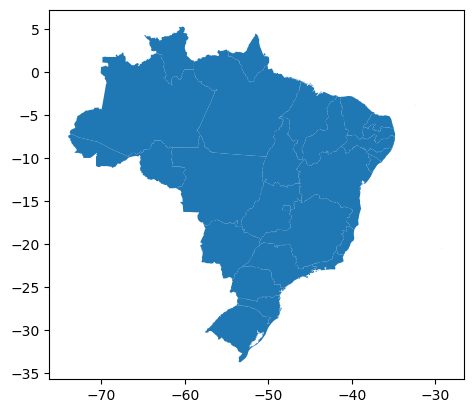

In [24]:
brazil.plot()

## What do we mean by a Coordinate Reference System?

So to explain, think of it this way...when we are creating map, like the one we just did above, the map is in 2-dimensions, YET the Earth is in 3D, and not just that, the earth is also "round". It is not flat. So what a coordinate reference system does is, it helps us translate 3D locations on the earth into a 2D plave, so that we can be able to map them on our 2D screens and maps.
There are different Coordinate Reference Systems- based on the cartographer, some are local- the projects are designed to fit local geography perfectly and may not perform as precisely when applied globally etc..that is why you need to check with CRS your data is using.

So why is the CRS so important? It is important because, when we are doing analysis especially with datasets from different sources, if the CRS are different our analysis will be incorrect.

In [25]:
#check the crs used
brazil.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [26]:
#you can also change your data's crs
brazil.to_crs(epsg=5641,inplace=True)

## Exploring Spatial Attributes of the Dataset

In [27]:
#calculating area- returns the area of the geometry
brazil['Area']=brazil.area/1000000
brazil.head()

,id,name,geometry,Area
0,AC,Acre,"POLYGON ((1625443.497 9188303.344, 1631862.077...",1.566614e+05
1,AL,Alagoas,"MULTIPOLYGON (((5789720.141 8904704.409, 57897...",2.849950e+04
2,AP,Amapá,"MULTIPOLYGON (((4218561.913 10095024.701, 4218...",1.421914e+05
3,AM,Amazonas,"MULTIPOLYGON (((3817892.257 6912098.486, 38186...",1.581721e+06
4,BA,Bahia,"MULTIPOLYGON (((5478708.799 7979311.630, 54787...",5.907267e+05


In [28]:
#calculating the centroid-returns the centre point of the geometry
brazil['Centre']=brazil.centroid
brazil.head()

,id,name,geometry,Area,Centre
0,AC,Acre,"POLYGON ((1625443.497 9188303.344, 1631862.077...",1.566614e+05,POINT (1946840.308 8966181.737)
1,AL,Alagoas,"MULTIPOLYGON (((5789720.141 8904704.409, 57897...",2.849950e+04,POINT (5709428.646 8943467.356)
2,AP,Amapá,"MULTIPOLYGON (((4218561.913 10095024.701, 4218...",1.421914e+05,POINT (4003069.531 10159251.372)
3,AM,Amazonas,"MULTIPOLYGON (((3817892.257 6912098.486, 38186...",1.581721e+06,POINT (2586424.782 9534443.527)
4,BA,Bahia,"MULTIPOLYGON (((5478708.799 7979311.630, 54787...",5.907267e+05,POINT (5141359.419 8607709.247)


In [29]:
#extracting boundaries from geometry- the boundary method just gives you the outline of the polygon
brazil['Boundary']=brazil.boundary
brazil.head()

,id,name,geometry,Area,Centre,Boundary
0,AC,Acre,"POLYGON ((1625443.497 9188303.344, 1631862.077...",1.566614e+05,POINT (1946840.308 8966181.737),"LINESTRING (1625443.497 9188303.344, 1631862.0..."
1,AL,Alagoas,"MULTIPOLYGON (((5789720.141 8904704.409, 57897...",2.849950e+04,POINT (5709428.646 8943467.356),"MULTILINESTRING ((5789720.141 8904704.409, 578..."
2,AP,Amapá,"MULTIPOLYGON (((4218561.913 10095024.701, 4218...",1.421914e+05,POINT (4003069.531 10159251.372),"MULTILINESTRING ((4218561.913 10095024.701, 42..."
3,AM,Amazonas,"MULTIPOLYGON (((3817892.257 6912098.486, 38186...",1.581721e+06,POINT (2586424.782 9534443.527),"MULTILINESTRING ((3817892.257 6912098.486, 381..."
4,BA,Bahia,"MULTIPOLYGON (((5478708.799 7979311.630, 54787...",5.907267e+05,POINT (5141359.419 8607709.247),"MULTILINESTRING ((5478708.799 7979311.630, 547..."


Calculating distances is one of most common operations you will do on a geodataframe. For example, we have a dataset with the districts in Brazil, we can calculate how far each district is from the famous Christ the Redeemer statue in Rio Ja Deniro. First, we find the coordinates of the Christ the Redeemer using geocoding and calculate the distances using the distance() method.

#### Geocoding

Geo-coding is the process of converting a place/address into its geographic coordinates.We will use geopy for all our geocoding needs.
Open your terminal and install geopy... run 'pip install geopy'


In [30]:
#geocoding
from geopy.geocoders import Nominatim

In [31]:
geolocator = Nominatim(user_agent="wamz")
location = geolocator.geocode("Christ the Redeemer")

print(location.point)
print(location.address)

22 57m 6.90228s S, 43 12m 37.6506s W
Cristo Redentor, Estrada do Corcovado, Santa Teresa, Rio de Janeiro, Região Geográfica Imediata do Rio de Janeiro, Região Metropolitana do Rio de Janeiro, Região Geográfica Intermediária do Rio de Janeiro, Rio de Janeiro, Região Sudeste, 22470-180, Brasil


In [32]:
lat,long=location.latitude,location.longitude
point=Point(long,lat)
christ_redeemer=gpd.GeoSeries([point],crs='EPSG:4326')
christ_redeemer=christ_redeemer.to_crs('EPSG:5641')

In [33]:
christ_redeemer

0    POINT (4976586.043 7392030.125)
dtype: geometry

In [34]:
brazil['Distance_to_Christ_Redeemer']=brazil.centroid.distance(christ_redeemer[0])/1000

## Spatial Joins

A spatial join, links the rows of one geodataframe with the rows of another, based on their geometric relationship.For example, is one geometry inside another, do they share a boundary, do they intersect?
Unlike the typical join we know in pandas, which is based on a column- spatial joins use spatial logic.

In [35]:
kenya=gpd.read_file(r'C:\Users\Pula Advisors\Desktop\GeoPandas_Project\kenya_shapefiles\ken_adm_iebc_20191031_shp (2)\ken_admbnda_adm1_iebc_20191031.shp')

<Axes: >

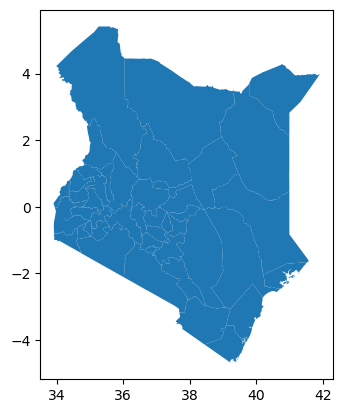

In [36]:
kenya.plot()

In [37]:
places=gpd.read_file(r"C:\Users\Pula Advisors\Desktop\GeoPandas_Project\shapefiles\gis_osm_pois_free_1.shp")

In [38]:
places.head()

,osm_id,code,fclass,name,geometry
0,30030203,2401,hotel,Muthu Silver Springs Hotel,POINT (36.80292 -1.29487)
1,30088423,2301,restaurant,China Plate,POINT (36.80624 -1.29236)
2,30088453,2001,police,Karen Police Station,POINT (36.70606 -1.32177)
3,30092040,2501,supermarket,Carrefour,POINT (36.76304 -1.29825)
4,30092128,2301,restaurant,Nairobi Bread Company,POINT (36.71254 -1.32893)


In [39]:
schools=places.loc[places['fclass']=='school']
schools.head()

,osm_id,code,fclass,name,geometry
5,30092225,2082,school,Kinderworld International School,POINT (36.82355 -1.31379)
7,30092294,2082,school,Nairobi Academy Secondary,POINT (36.75327 -1.34018)
21,30312225,2082,school,Consolata School,POINT (36.80406 -1.26749)
32,30402763,2082,school,Aga Khan Nursery,POINT (36.81492 -1.27217)
74,295848487,2082,school,Pangani Girls Secondary School,POINT (36.83739 -1.26894)


In [40]:
print(schools.crs)
print(kenya.crs)

EPSG:4326
EPSG:4326


In [41]:
#assign each school to its county using a spatial join
schools_per_county = gpd.sjoin(schools, kenya, how='left', predicate='within')
schools_per_county.head()

,osm_id,code,fclass,name,geometry,index_right,Shape_Leng,Shape_Area,ADM1_EN,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM0_EN,ADM0_PCODE,date,validOn,validTo
5,30092225,2082,school,Kinderworld International School,POINT (36.82355 -1.31379),29.0,1.658061,0.057496,Nairobi,KE047,None,None,None,Kenya,KE,2017-11-03,2019-10-31,None
7,30092294,2082,school,Nairobi Academy Secondary,POINT (36.75327 -1.34018),29.0,1.658061,0.057496,Nairobi,KE047,None,None,None,Kenya,KE,2017-11-03,2019-10-31,None
21,30312225,2082,school,Consolata School,POINT (36.80406 -1.26749),29.0,1.658061,0.057496,Nairobi,KE047,None,None,None,Kenya,KE,2017-11-03,2019-10-31,None
32,30402763,2082,school,Aga Khan Nursery,POINT (36.81492 -1.27217),29.0,1.658061,0.057496,Nairobi,KE047,None,None,None,Kenya,KE,2017-11-03,2019-10-31,None
74,295848487,2082,school,Pangani Girls Secondary School,POINT (36.83739 -1.26894),29.0,1.658061,0.057496,Nairobi,KE047,None,None,None,Kenya,KE,2017-11-03,2019-10-31,None


In [42]:
#we want to plot the distribution of schools per county, so we count the no. of schools per county
school_counts = schools_per_county.groupby('ADM1_EN').size().reset_index(name='num_schools')
school_counts.head()

,ADM1_EN,num_schools
0,Baringo,297
1,Bomet,2
2,Bungoma,158
3,Busia,69
4,Elgeyo-Marakwet,5


In [43]:
#now to plot the number of schools per county, we need the geometry objects for the counties, so merge 
#school counts back to the kenya geodataframe
#Can you see this time it is not a spatial join, but a join based on a key column?

counties_gdf = kenya.merge(school_counts, on='ADM1_EN', how='left')
counties_gdf['num_schools'] = counties_gdf['num_schools'].fillna(0)
counties_gdf.head()

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry,num_schools
0,5.932315,0.884732,Baringo,KE030,None,None,None,Kenya,KE,2017-11-03,2019-10-31,None,"POLYGON ((35.78390 1.65557, 35.78496 1.65554, ...",297.0
1,2.922220,0.198099,Bomet,KE036,None,None,None,Kenya,KE,2017-11-03,2019-10-31,None,"POLYGON ((35.47360 -0.39920, 35.47845 -0.40663...",2.0
2,3.062486,0.245058,Bungoma,KE039,None,None,None,Kenya,KE,2017-11-03,2019-10-31,None,"POLYGON ((34.62017 1.10228, 34.62133 1.10160, ...",158.0
3,2.670396,0.147178,Busia,KE040,None,None,None,Kenya,KE,2017-11-03,2019-10-31,None,"POLYGON ((34.36097 0.77730, 34.36172 0.77696, ...",69.0
4,3.888933,0.244432,Elgeyo-Marakwet,KE028,None,None,None,Kenya,KE,2017-11-03,2019-10-31,None,"POLYGON ((35.69818 1.28225, 35.69788 1.27905, ...",5.0


## Plotting Choropleths...

<Figure size 1000x600 with 0 Axes>

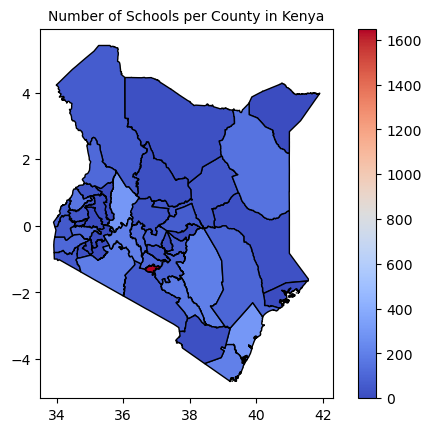

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
counties_gdf.plot(column='num_schools', cmap='coolwarm', legend=True, edgecolor='black')

plt.title("Number of Schools per County in Kenya", fontsize=10)
plt.show()

### Take Home Assignment for Spatial Analysis

1. Plot the distribution of hospitals per county in Kenya.
2. Show on a map, which county would be considered the unsafest- based solely on the number of police stations